## Import Libraries/Dataset

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
from sklearn import preprocessing, metrics, linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

### Reading Inputs

In [2]:
#dayURL = ('https://github.com/Machine-Learning-Wilp/BikeSharing/blob/main/day.csv')
#hourURL = ('https://github.com/Machine-Learning-Wilp/BikeSharing/blob/main/hour.csv')
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

## Data Visualization and Exploration

### Sanity Check on datasets

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Changing Column names to match  target

In [5]:
day_df.rename(columns={'instant':'id','dteday':'Date','yr':'Year','mnth':'Month','weathersit':'WeatherCondition','atemp':'FeelingTemp','hum':'Humidity','cnt':'TotalRentDay'},inplace=True)
hour_df.rename(columns={'instant':'id','dteday':'Date','yr':'Year','mnth':'Month','hr':'Hours','weathersit':'WeatherCondition','atemp':'FeelingTemp','hum':'Humidity','cnt':'TotalRentHourly'},inplace=True)

In [6]:
day_df.head()

,id,Date,season,Year,Month,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentDay
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df.head()

,id,Date,season,Year,Month,Hours,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentHourly
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Discription and Shape

In [8]:
# Describing day.csv
day_df.describe()

,id,season,Year,Month,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentDay
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
day_df.shape

(731, 16)

In [10]:
#Describing hour.csv
hour_df.describe()

,id,season,Year,Month,Hours,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentHourly
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
hour_df.shape

(17379, 17)

### Data Visualization

#### Visualizing day data

In [12]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

#Custom method for visualizing dataset
def plot_stack_bar_chart(data, col, name):
    plt.figure(figsize=(10,2)) #Size of a PLot
    p1 = plt.bar(data[col].unique(),  # the x locations for the groups
                data.groupby([col])['casual'].sum(), color = 'k') # Count of casual per season

    p2 = plt.bar(data[col].unique(),  # the x locations for the groups
                data.groupby([col])['registered'].sum(), # Count of Registered per season
                 bottom = data.groupby([col])['casual'].sum(), color = 'c') # Count of casual per season

    plt.ylabel('Count')
    plt.title("Count by Casual and Registered for each {} in {} Data".format(col, get_df_name(data)))
    plt.xticks(data[col].unique(), name)
    plt.legend((p1[0], p2[0]), ('Casual', 'Registered'))
    plt.show()

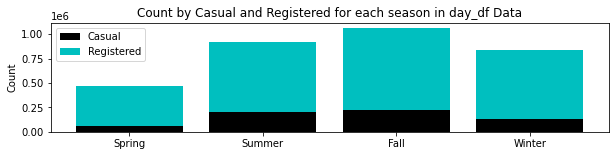

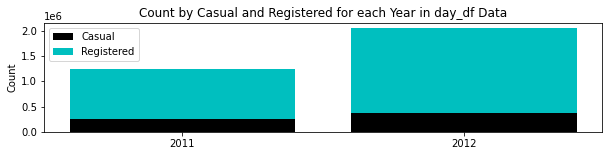

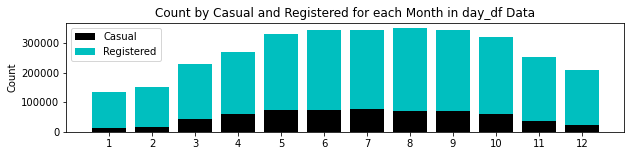

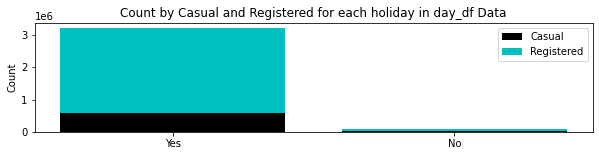

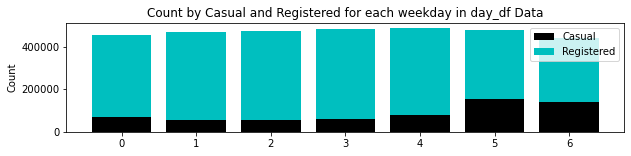

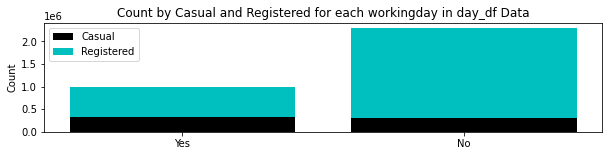

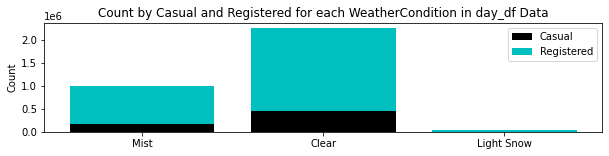

In [13]:
plot_stack_bar_chart(day_df, 'season', ('Spring', 'Summer', 'Fall', 'Winter'))
plot_stack_bar_chart(day_df, 'Year', ('2011', '2012'))
plot_stack_bar_chart(day_df, 'Month', [str(i) for i in day_df['Month'].unique()])
plot_stack_bar_chart(day_df, 'holiday', ('Yes', 'No'))
plot_stack_bar_chart(day_df, 'weekday', [str(i) for i in day_df['weekday'].unique()])
plot_stack_bar_chart(day_df, 'workingday', ('Yes', 'No'))
plot_stack_bar_chart(day_df, 'WeatherCondition', ('Clear', 'Mist', 'Light Snow'))

#### Visualizing hour data

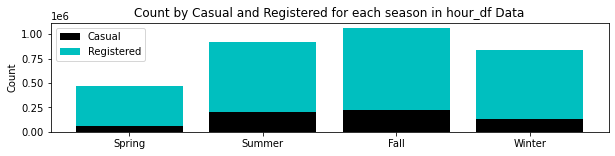

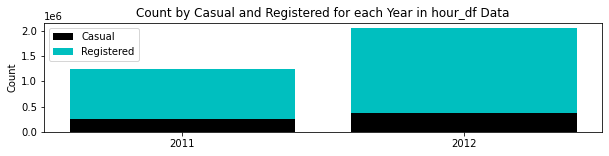

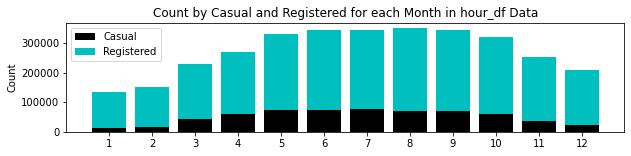

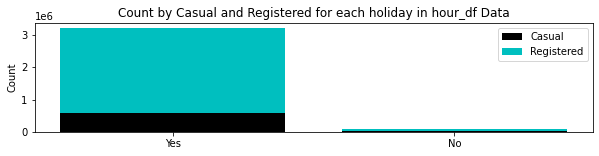

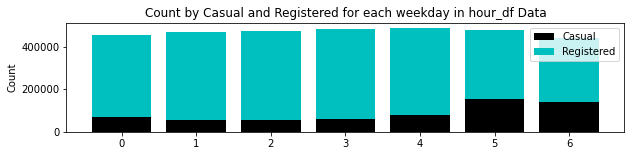

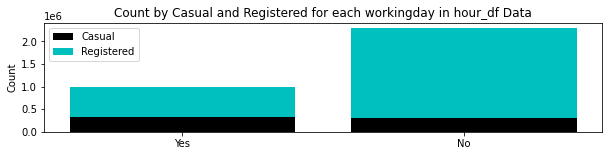

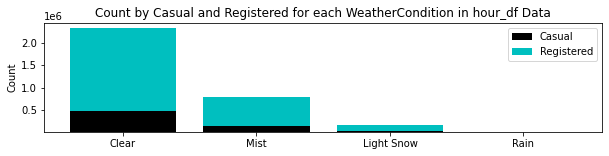

In [14]:
plot_stack_bar_chart(hour_df, 'season', ('Spring', 'Summer', 'Fall', 'Winter'))
plot_stack_bar_chart(hour_df, 'Year', ('2011', '2012'))
plot_stack_bar_chart(hour_df, 'Month', [str(i) for i in hour_df['Month'].unique()])
plot_stack_bar_chart(hour_df, 'holiday', ('Yes', 'No'))
plot_stack_bar_chart(hour_df, 'weekday', [str(i) for i in hour_df['weekday'].unique()])
plot_stack_bar_chart(hour_df, 'workingday', ('Yes', 'No'))
plot_stack_bar_chart(hour_df, 'WeatherCondition', ('Clear', 'Mist', 'Light Snow', 'Rain'))

### Exploratory Data Analysis

#### Effect of Holidays on count of rental bikes

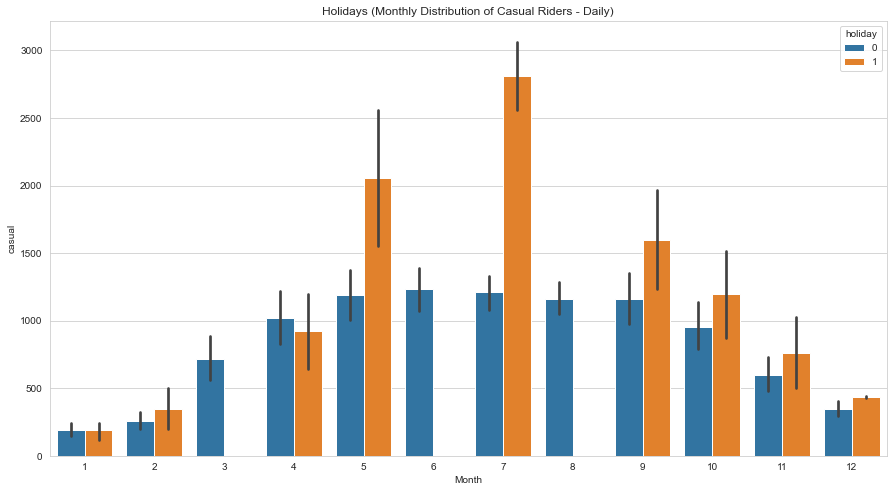

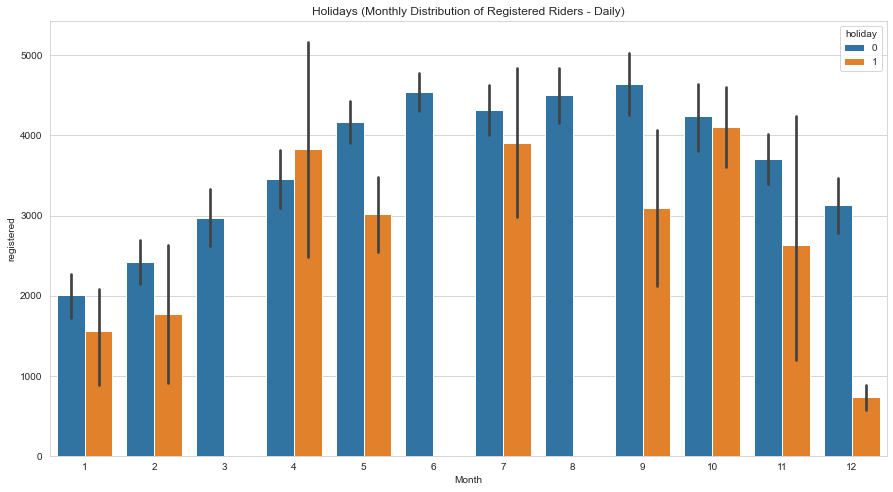

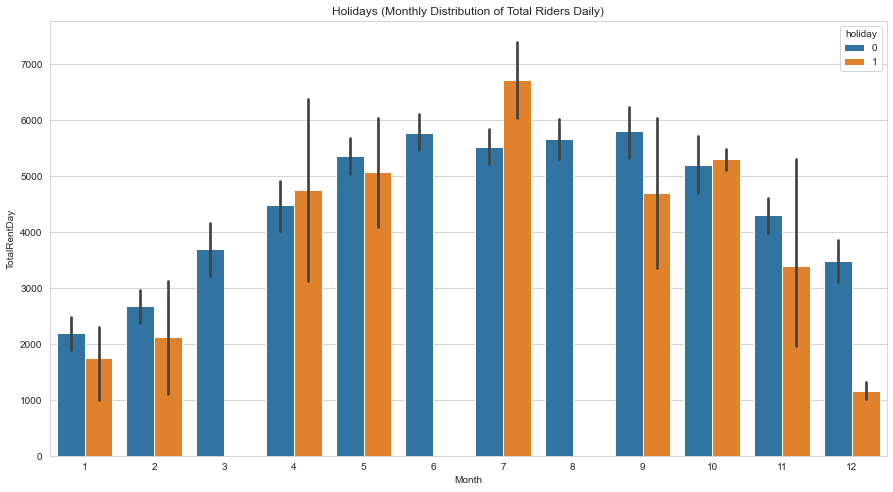

In [15]:
sns.set_style('whitegrid')

#Bar-plot for monthly distribution of CasualRiders in respect to holiday
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='casual',data=day_df[['Month','casual','holiday']],hue='holiday',ax=ax)
ax.set_title('Holidays (Monthly Distribution of Casual Riders - Daily)')
plt.show()

#Bar-plot for monthly distribution of RegisteredRiders in respect to holiday
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='registered',data=day_df[['Month','registered','holiday']],hue='holiday',ax=ax1)
ax1.set_title('Holidays (Monthly Distribution of Registered Riders - Daily)')
plt.show()

#Bar-plot for monthly distribution of TotalRentals in a day in respect to holiday
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='TotalRentDay',data=day_df[['Month','TotalRentDay','holiday']],hue='holiday',ax=ax2)
ax2.set_title('Holidays (Monthly Distribution of Total Riders Daily)')
plt.show()

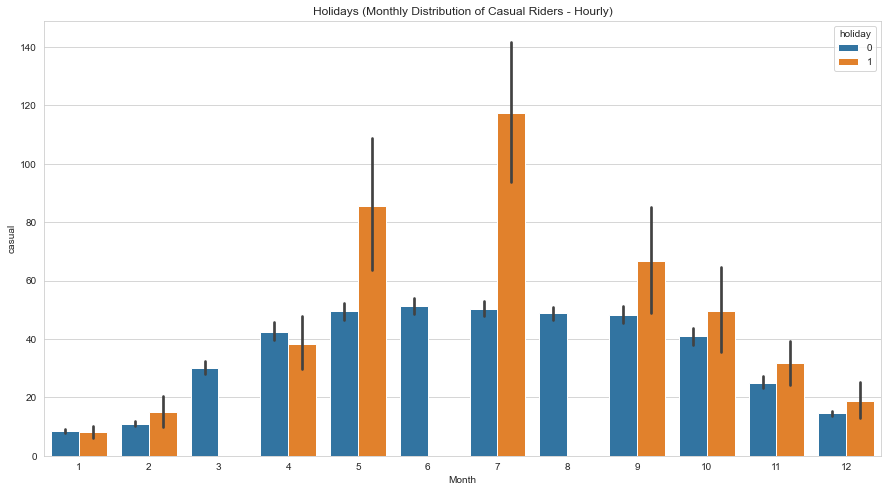

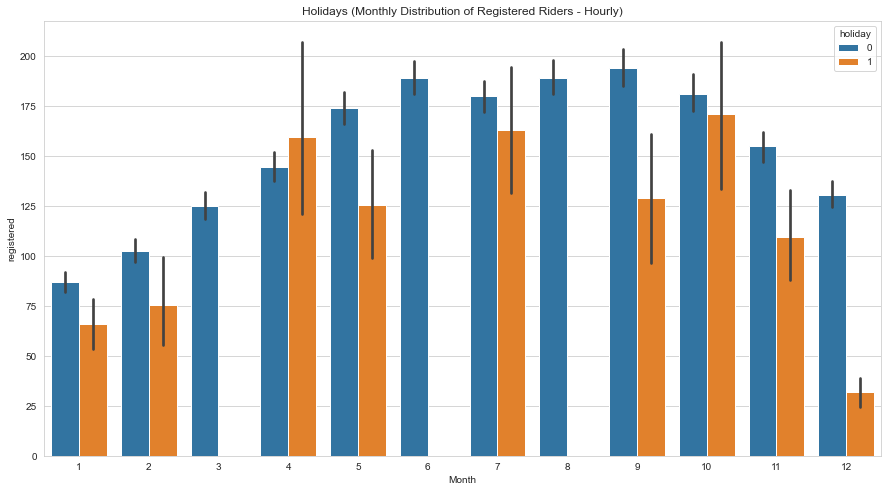

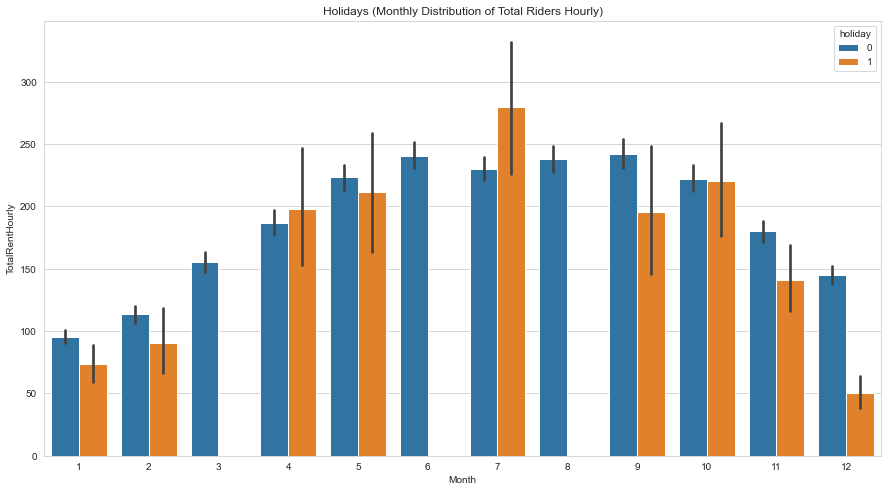

In [16]:
sns.set_style('whitegrid')

#Bar-plot for monthly distribution of CasualRiders in respect to holiday
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='casual',data=hour_df[['Month','casual','holiday']],hue='holiday',ax=ax)
ax.set_title('Holidays (Monthly Distribution of Casual Riders - Hourly)')
plt.show()

#Bar-plot for monthly distribution of RegisteredRiders in respect to holiday
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='registered',data=hour_df[['Month','registered','holiday']],hue='holiday',ax=ax1)
ax1.set_title('Holidays (Monthly Distribution of Registered Riders - Hourly)')
plt.show()

#Bar-plot for monthly distribution of TotalRentals in a day in respect to holiday
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='TotalRentHourly',data=hour_df[['Month','TotalRentHourly','holiday']],hue='holiday',ax=ax2)
ax2.set_title('Holidays (Monthly Distribution of Total Riders Hourly)')
plt.show()

#### Holiday vs Weekends on count

In [17]:
# Checking for weekends (0 is considered as Sunday and 6 as saturday of weekday column)
day_df['isWeekend'] = np.where(((day_df['weekday']== 0) | (day_df['weekday'] == 6)), 1, 0)

In [18]:
day_df.head()

,id,Date,season,Year,Month,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentDay,isWeekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0


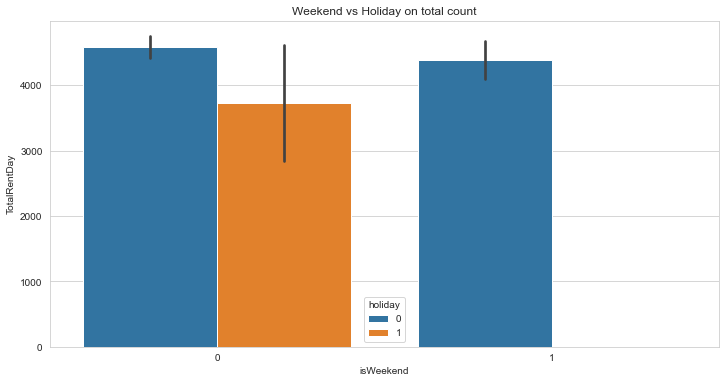

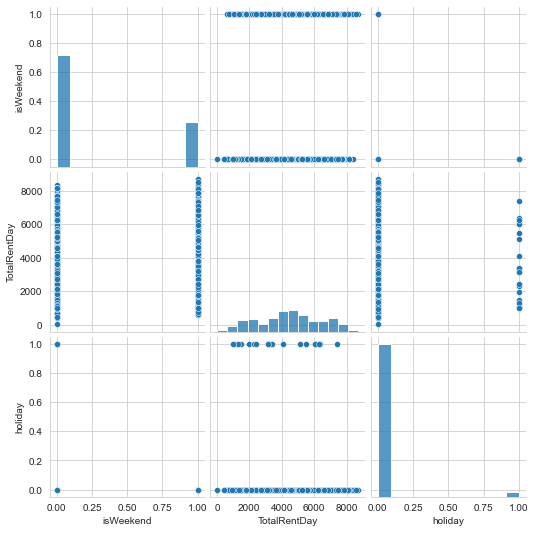

In [19]:
fig,ax=plt.subplots(figsize=(12,6))

sns.barplot(data=day_df,x='isWeekend',y='TotalRentDay',hue='holiday')
sns.pairplot(data = day_df[['isWeekend','TotalRentDay', 'holiday' ]], palette='hls')
ax.set_title('Weekend vs Holiday on total count')
plt.show()

#### Temperature vs Feeling temperature

<AxesSubplot:>

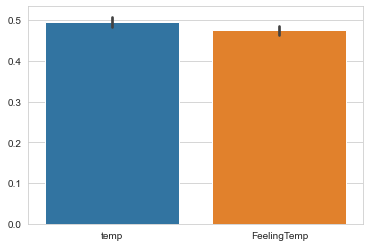

In [20]:
sns.barplot(data=day_df[['temp', 'FeelingTemp']])

<AxesSubplot:>

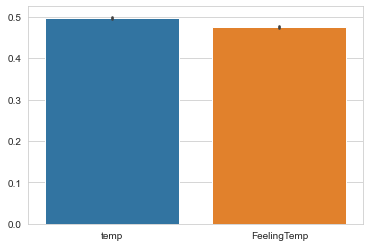

In [21]:
sns.barplot(data=hour_df[['temp', 'FeelingTemp']])

#### Relation between Casual, Registered and Count

#### Effect of Humidity, Windspeed and Temperature on count

### Data-Preprocessing and Cleaning

#### Identifying NULL or missing values

In [22]:
def missing_values(data):
    total = data.isnull().sum()
    percent = (total/data.isnull().count()*100)
    miss_column = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    miss_column['Types'] = types
    return(np.transpose(miss_column)) 

In [23]:
#Checking missing values on day.csv
missing_values(day_df)

,id,Date,season,Year,Month,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentDay,isWeekend
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,object,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int32


In [24]:
#Checking missing values on hour.csv
missing_values(hour_df)

,id,Date,season,Year,Month,Hours,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentHourly
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,object,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64


#### Identifying Outliers

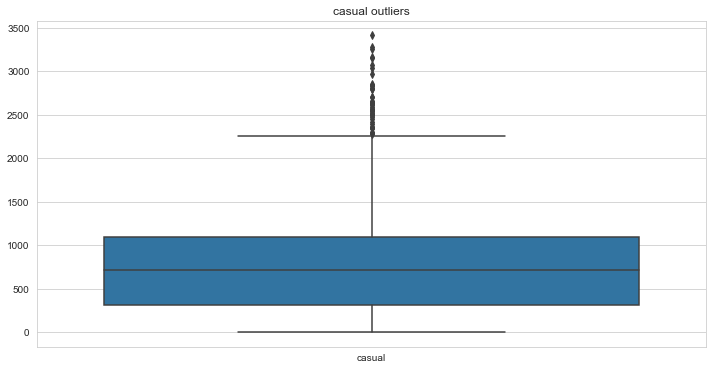

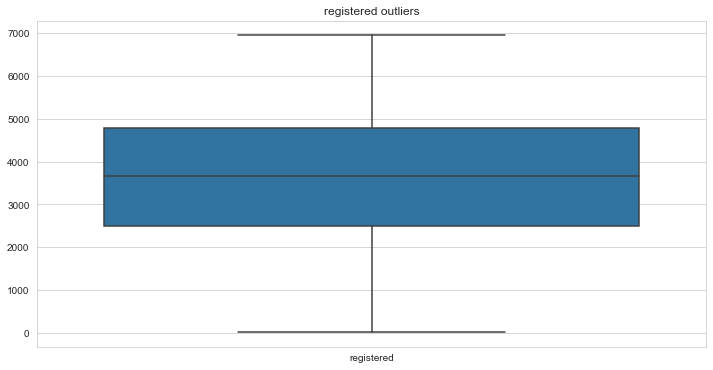

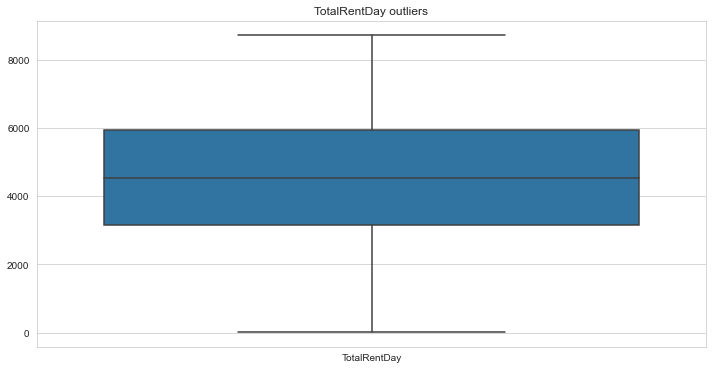

In [25]:
#Outliers in day.csv

fig,ax=plt.subplots(figsize=(12,6))
#Boxplot for casuals outliers
sns.boxplot(data=day_df[['casual']])
ax.set_title('casual outliers')
plt.show()

fig,ax=plt.subplots(figsize=(12,6))
#Boxplot for registered outliers
sns.boxplot(data=day_df[['registered']])
ax.set_title('registered outliers')
plt.show()

fig,ax=plt.subplots(figsize=(12,6))
#Boxplot for TotalRiders outliers
sns.boxplot(data=day_df[['TotalRentDay']])
ax.set_title('TotalRentDay outliers')
plt.show()

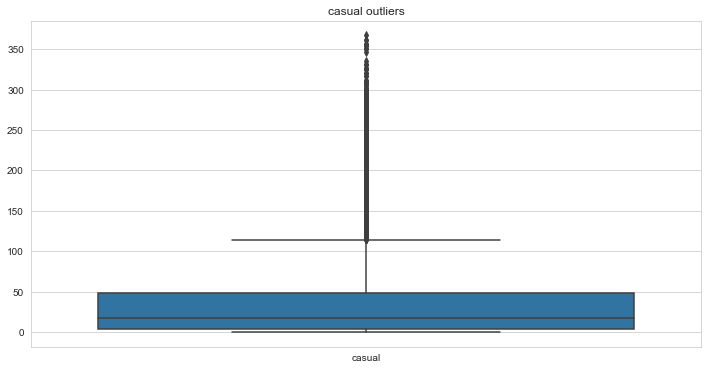

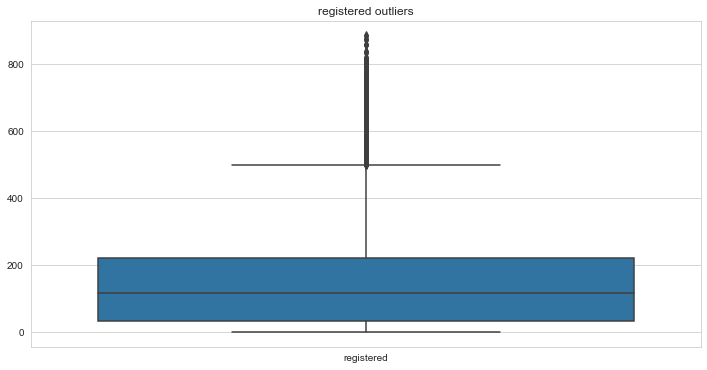

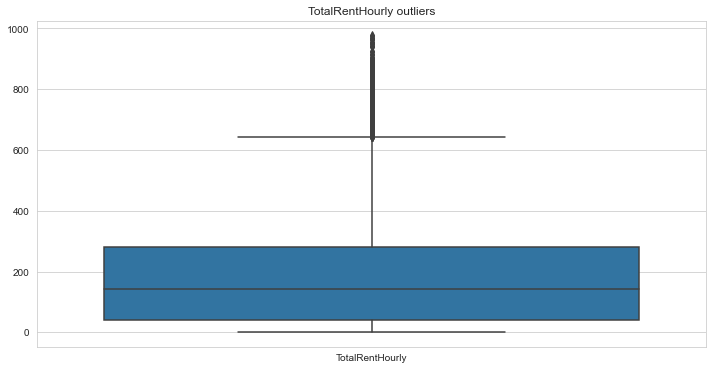

In [26]:
#Outliers in hour.csv

fig,ax=plt.subplots(figsize=(12,6))
#Boxplot for casuals outliers
sns.boxplot(data=hour_df[['casual']])
ax.set_title('casual outliers')
plt.show()

fig,ax=plt.subplots(figsize=(12,6))
#Boxplot for registered outliers
sns.boxplot(data=hour_df[['registered']])
ax.set_title('registered outliers')
plt.show()

fig,ax=plt.subplots(figsize=(12,6))
#Boxplot for TotalRiders outliers
sns.boxplot(data=hour_df[['TotalRentHourly']])
ax.set_title('TotalRentHourly outliers')
plt.show()

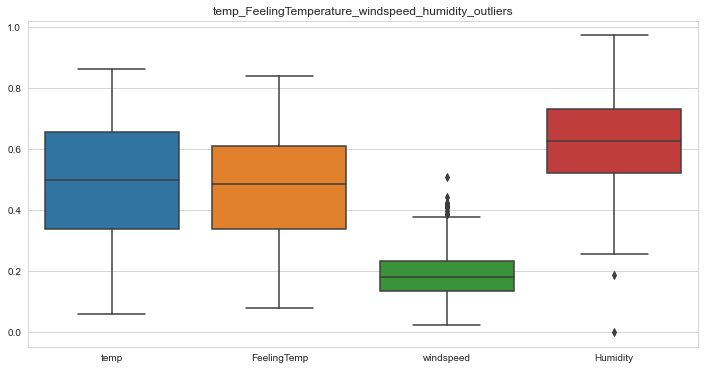

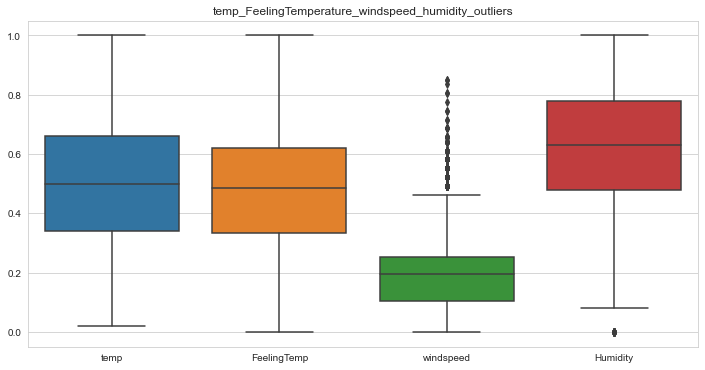

In [27]:
#Checking outliers based on temp, feelingTemp, humidity, windspeed

#For day.csv
fig,ax=plt.subplots(figsize=(12,6))
#Boxplot for casuals outliers
sns.boxplot(data=day_df[['temp','FeelingTemp','windspeed','Humidity']])
ax.set_title('temp_FeelingTemperature_windspeed_humidity_outliers')
plt.show()

#For hour.csv
fig,ax=plt.subplots(figsize=(12,6))
#Boxplot for casuals outliers
sns.boxplot(data=hour_df[['temp','FeelingTemp','windspeed','Humidity']])
ax.set_title('temp_FeelingTemperature_windspeed_humidity_outliers')
plt.show()

#### Correcting Outliers

In [28]:
# Outliers found on windspped and humidity columns for day.csv
outlierCorrectionDay = pd.DataFrame(day_df, columns = ['windspeed', 'Humidity'])
colName = ['windspeed', 'Humidity']

for col in colName:
    q75,q25 = np.percentile(outlierCorrectionDay.loc[:,col],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr = q75-q25 #Inter quantile range
    min = q25-(iqr*1.5) #inner fence
    max = q75+(iqr*1.5) #outer fence
    outlierCorrectionDay.loc[outlierCorrectionDay.loc[:,col] < min,:col] = np.nan  #Replace with NA
    outlierCorrectionDay.loc[outlierCorrectionDay.loc[:,col] > max,:col] = np.nan  #Replace with NA
print('Shape after dropping outlier (windspeed,humidity) for day:',outlierCorrectionDay.dropna().shape)
print('Shape before dropping outlier (windspeed,humidity) for day:',day_df[['windspeed','Humidity']].shape)
#Replacing the outliers by mean values
outlierCorrectionDay['windspeed'] = outlierCorrectionDay['windspeed'].fillna(outlierCorrectionDay['windspeed'].mean())
outlierCorrectionDay['Humidity'] = outlierCorrectionDay['Humidity'].fillna(outlierCorrectionDay['Humidity'].mean())

Shape after dropping outlier (windspeed,humidity) for day: (717, 2)
Shape before dropping outlier (windspeed,humidity) for day: (731, 2)


In [29]:
# Outliers found on windspped and humidity columns for hour.csv
outlierCorrectionHour = pd.DataFrame(hour_df, columns = ['windspeed', 'Humidity'])
colName = ['windspeed', 'Humidity']

for col in colName:
    q75,q25 = np.percentile(outlierCorrectionHour.loc[:,col],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr = q75-q25 #Inter quantile range
    min = q25-(iqr*1.5) #inner fence
    max = q75+(iqr*1.5) #outer fence
    outlierCorrectionHour.loc[outlierCorrectionHour.loc[:,col] < min,:col] = np.nan  #Replace with NA
    outlierCorrectionHour.loc[outlierCorrectionHour.loc[:,col] > max,:col] = np.nan  #Replace with NA
#Replacing the outliers by mean values
outlierCorrectionHour['windspeed'] = outlierCorrectionHour['windspeed'].fillna(outlierCorrectionHour['windspeed'].mean())
outlierCorrectionHour['Humidity'] = outlierCorrectionHour['Humidity'].fillna(outlierCorrectionHour['Humidity'].mean())

In [30]:
# Replacing corrected values in original dataset - day.csv
day_df['windspeed'] = day_df['windspeed'].replace(outlierCorrectionDay['windspeed'])
day_df['Humidity'] = day_df['Humidity'].replace(outlierCorrectionDay['Humidity'])
day_df.head()

,id,Date,season,Year,Month,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentDay,isWeekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0


In [31]:
# Replacing corrected values in original dataset - hour.csv
hour_df['windspeed'] = hour_df['windspeed'].replace(outlierCorrectionHour['windspeed'])
hour_df['Humidity'] = hour_df['Humidity'].replace(outlierCorrectionHour['Humidity'])
hour_df.head()

,id,Date,season,Year,Month,Hours,holiday,weekday,workingday,WeatherCondition,temp,FeelingTemp,Humidity,windspeed,casual,registered,TotalRentHourly
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Text(0.5, 1.0, 'Pairplot after hadling outliers')

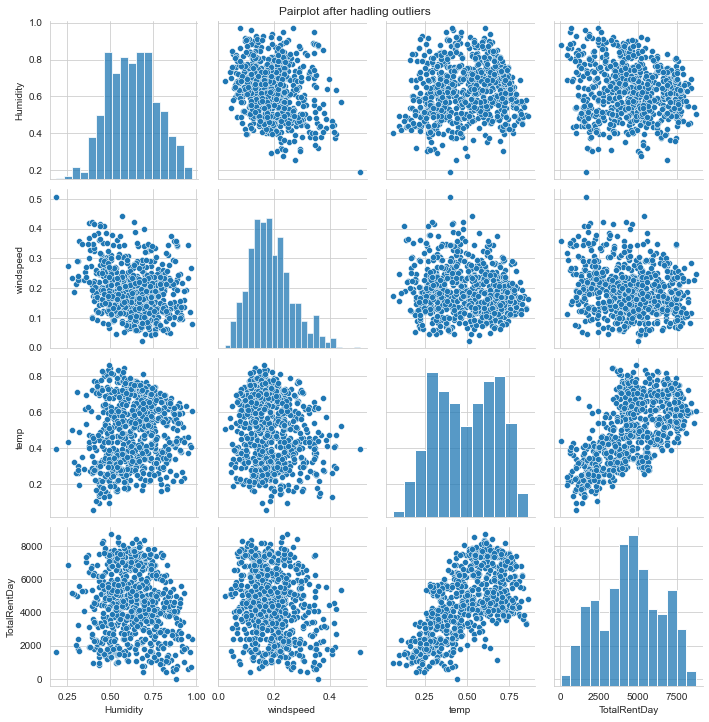

In [32]:
ax = sns.pairplot(data=day_df[['Humidity','windspeed','temp','TotalRentDay']],palette='hls') 
ax.fig.suptitle('Pairplot after hadling outliers', y=1.0)

#### Feature Transform

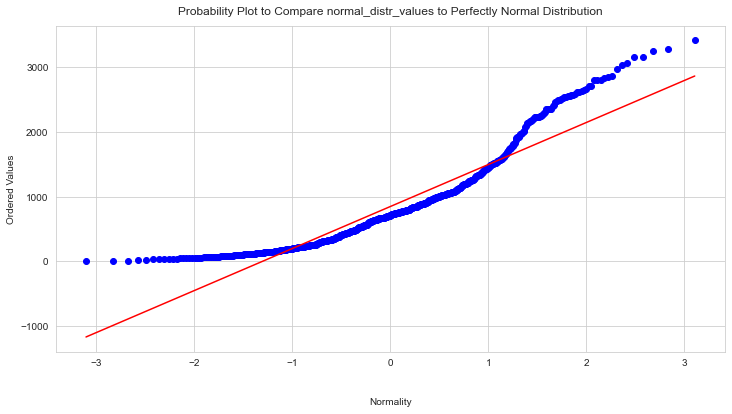

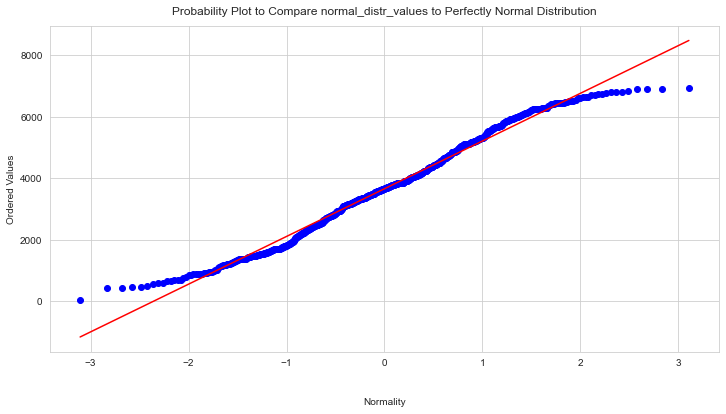

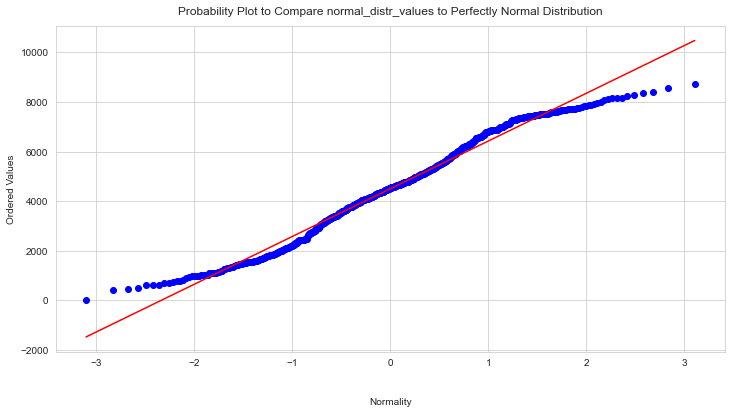

In [33]:
# Normality check on registed, casual and totalRentday features on day.csv
plt.figure(figsize=(12,6))
stats.probplot(day_df.casual.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

plt.figure(figsize=(12,6))
stats.probplot(day_df.registered.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

plt.figure(figsize=(12,6))
stats.probplot(day_df.TotalRentDay.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

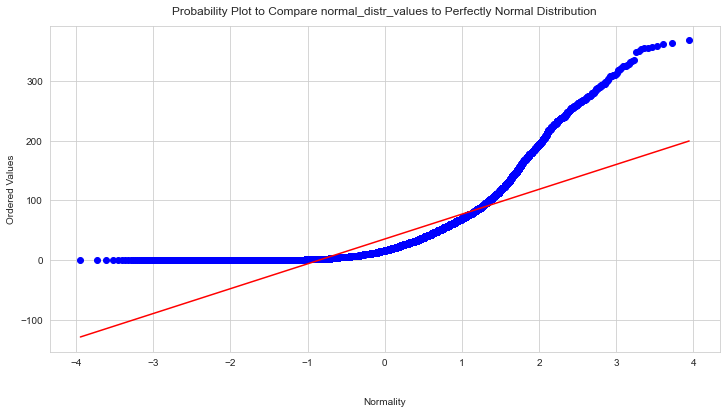

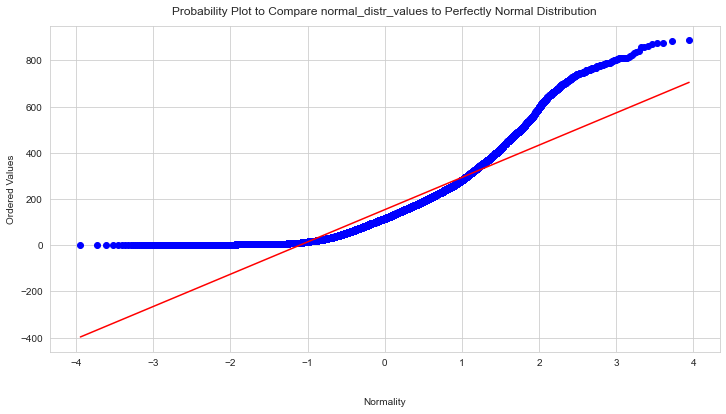

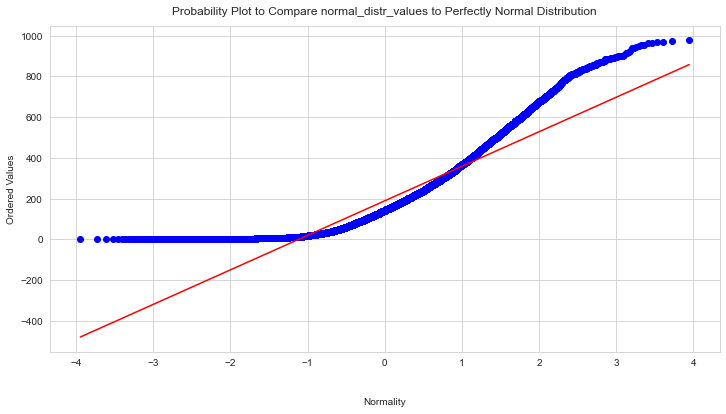

In [34]:
# Normality check on registed, casual and totalRentday features on hour.csv
plt.figure(figsize=(12,6))
stats.probplot(hour_df.casual.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

plt.figure(figsize=(12,6))
stats.probplot(hour_df.registered.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

plt.figure(figsize=(12,6))
stats.probplot(hour_df.TotalRentHourly.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

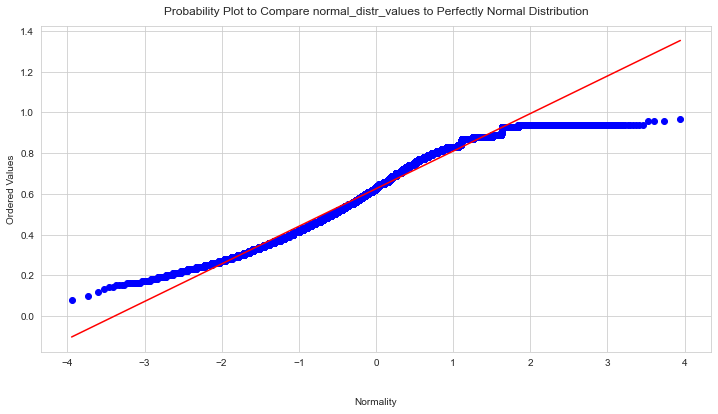

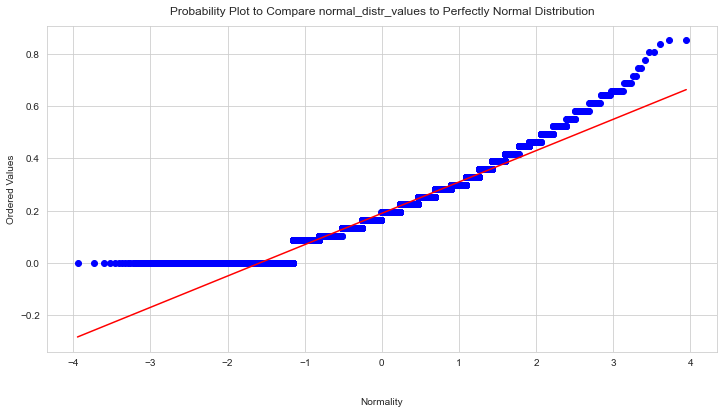

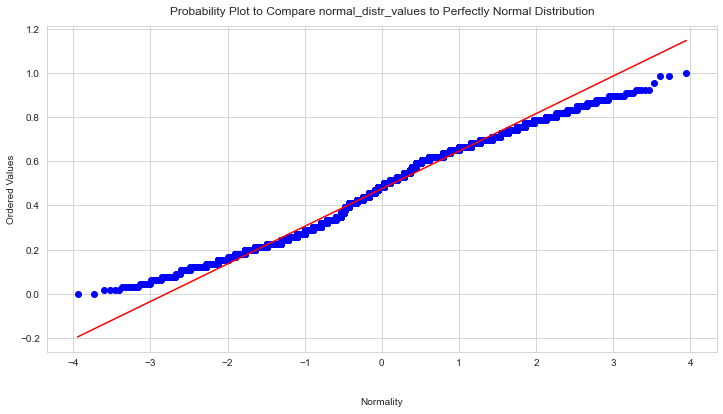

In [35]:
# Normality check on humidity, windspeed, feelingTemp features on hour.csv
plt.figure(figsize=(12,6))
stats.probplot(hour_df.Humidity.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

plt.figure(figsize=(12,6))
stats.probplot(hour_df.windspeed.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

plt.figure(figsize=(12,6))
stats.probplot(hour_df.FeelingTemp.tolist(), dist = 'norm', plot= plt)
plt.xlabel("Normality", labelpad=30)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

#### Correlation Analysis

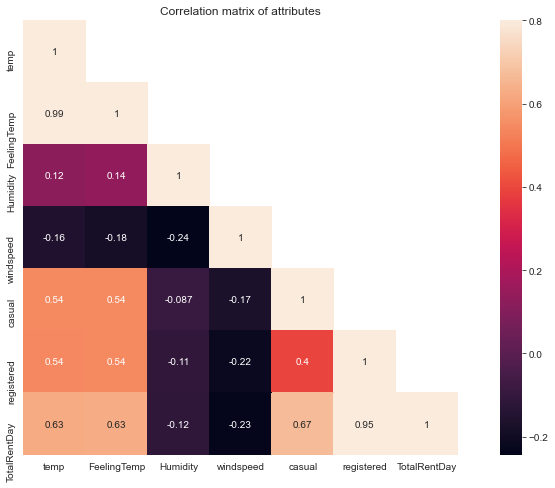

In [36]:
#Correlation matrix of day.csv
correMtr=day_df[["temp","FeelingTemp","Humidity","windspeed","casual","registered","TotalRentDay"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

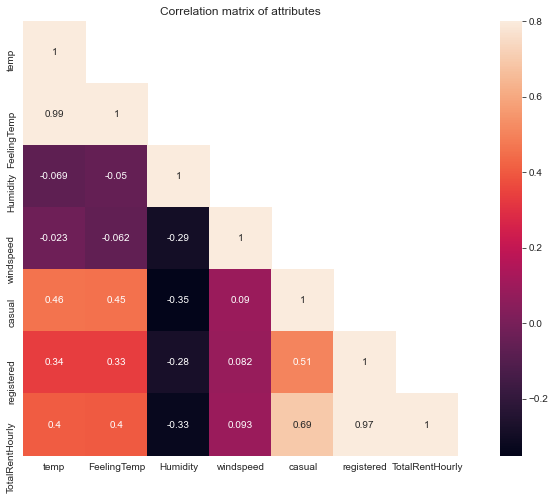

In [37]:
#Correaltion matrix of hour.csv
correMtr=hour_df[["temp","FeelingTemp","Humidity","windspeed","casual","registered","TotalRentHourly"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

### Data Preparation

In [38]:
#Split the dataset into the train and test data
xrain,xest,yrain,yest=train_test_split(hour_df.iloc[:,0:-3],hour_df.iloc[:,-1],test_size=0.2, random_state=40)

#ReSetting train indes
xrain.reset_index(inplace=True)
yrain=yrain.reset_index()

xest.reset_index(inplace=True)
yest=yest.reset_index()

print("xrain: {}\nxest: {}\nyrain: {}\nyest: {}".format(xrain.shape,xest.shape,yrain.shape,yest.shape))
print(yrain.head())
print(yest.head())

print(xrain.head())
print(xest.head())

xrain: (13903, 15)
xest: (3476, 15)
yrain: (13903, 2)
yest: (3476, 2)
   index  TotalRentHourly
0   5972              227
1   4785               45
2   7479               23
3   5478                6
4   9530               14
   index  TotalRentHourly
0   8986               17
1   5566              334
2  15629              218
3   9804              286
4   3337               72
   index    id        Date  season  Year  Month  Hours  holiday  weekday  \
0   5972  5973  2011-09-11       3     0      9      9        0        0   
1   4785  4786  2011-07-23       3     0      7      7        0        6   
2   7479  7480  2011-11-13       4     0     11      6        0        0   
3   5478  5479  2011-08-21       3     0      8      4        0        0   
4   9530  9531  2012-02-07       1     1      2      1        0        2   

   workingday  WeatherCondition  temp  FeelingTemp  Humidity  windspeed  
0           0                 1  0.66       0.6212      0.74     0.0000  
1           0

In [39]:
#Create a new dataset for train attributes
train_attr=xrain[['season','Month','Year','weekday','holiday','workingday','WeatherCondition','Humidity','FeelingTemp','windspeed','Hours']]
#Create a new dataset for test attributes
test_attr=xest[['season','Month','Year','weekday','holiday','workingday','Humidity','FeelingTemp','windspeed','WeatherCondition','Hours']]
#categorical attributes
cat_attr=['season','holiday','workingday','WeatherCondition','Year','Hours']
#numerical attributes
num_attr=['FeelinTemp','windspeed','Humidity','Month','weekday']

In [44]:
#Getting dummy values
EncodedXrain=pd.get_dummies(train_attr,columns=cat_attr)
print("Shape of the Encoded xrain: {}".format(EncodedXrain.shape))
EncodedXrain.head()

Shape of the Encoded xrain: (13903, 43)


,Month,weekday,Humidity,FeelingTemp,windspeed,season_1,season_2,season_3,season_4,holiday_0,...,Hours_14,Hours_15,Hours_16,Hours_17,Hours_18,Hours_19,Hours_20,Hours_21,Hours_22,Hours_23
0,9,0,0.74,0.6212,0.0000,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7,6,0.52,0.7424,0.1045,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,11,0,0.66,0.3333,0.1343,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0.83,0.6364,0.2239,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0.61,0.2879,0.1343,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
